# Classification - Decision Tree - Education_Attainment

Now we try a Decision Tree Classifier from sklearn on the same Internat Usage Education_Attainment data. The same interface is used as the k-nearest-networks classifier.

Again, we separate the data into training and test data.

In [1]:
# Import feature subset with Education_Attainment Column and one hot encoded values

from sklearn import neighbors, datasets
import pandas as pd
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
import itertools
import re, string
import sys
sys.path.append('../resources')
from w6support import plot_2d_class
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
originalDF = pd.read_csv('educationFeatureSubset.csv')

# Next we check the Education_Attainment options in the dataset for use with classification
print(originalDF.Education_Attainment.unique())

# Now we replace those values with integers for use with the classification algorithm
education_values = {"Education_Attainment": {"Masters": 1, "Some_College": 2, "College": 3, "High_School": 4, "Professional": 5, "Grammar": 6, "Special": 7, "Doctoral": 8, "Other": 9}}
originalDF.replace(education_values, inplace=True)

featureDF = originalDF[originalDF.columns.difference(['Education_Attainment', 'Unnamed: 0'])]
featureDF.head(5)

['Masters' 'Some_College' 'College' 'High_School' 'Professional' 'Grammar'
 'Special' 'Doctoral' 'Other']


Actual_Time  Age  Country  Household_Income  Marital_Status  \
0           14   31      114                 7               1   
1           13   18      114                 8               5   
2           34   15       31                 7               3   
3           40   18       41                 4               3   
4           24    7       88                 8               5   

   Primary_Computing_Platform  Primary_Place_of_WWW_Access  \
0                           3                            5   
1                          10                            2   
2                          10                            5   
3                          10                            2   
4                          10                            4   

   Who_Pays_for_Access_Parents  Who_Pays_for_Access_School  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   Willingness_to_Pay_Fees  
0                        4  
1                        0  
2                        4  
3                        0  
4                        0

I split the dataset by using function train_test_split(). I pass 3 parameters: features, target, and test_set size.

In [3]:
X, y = featureDF, originalDF['Education_Attainment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Next I build the decision tree model:

In [4]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [5]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.3247609627431586


Well, you got a classification rate of 32%, considered as not optimal accuracy. I will try to improve this accuracy by tuning the parameters in the Decision Tree Algorithm later.

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.104816 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.104816 to fit



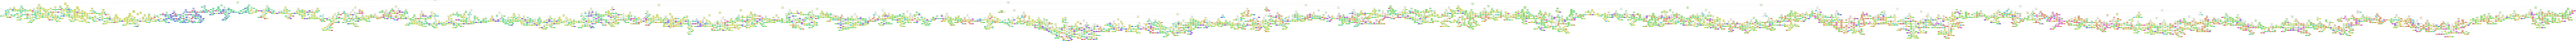

In [6]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = featureDF.columns.values,class_names=['1','2','3','4','5','6','7','8','9'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decisionTree/education/education-decision-tree.png')
Image(graph.create_png())

As is noticeable, the tree is very difficult to interpret. Lets see if the accuracy can be further improved upon.

In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.4061984833498187


In the above example, I plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, I have added the attribute selection measure entropy. This has improved the classification accuracy from 32% to 40% which is a marginal improvement.

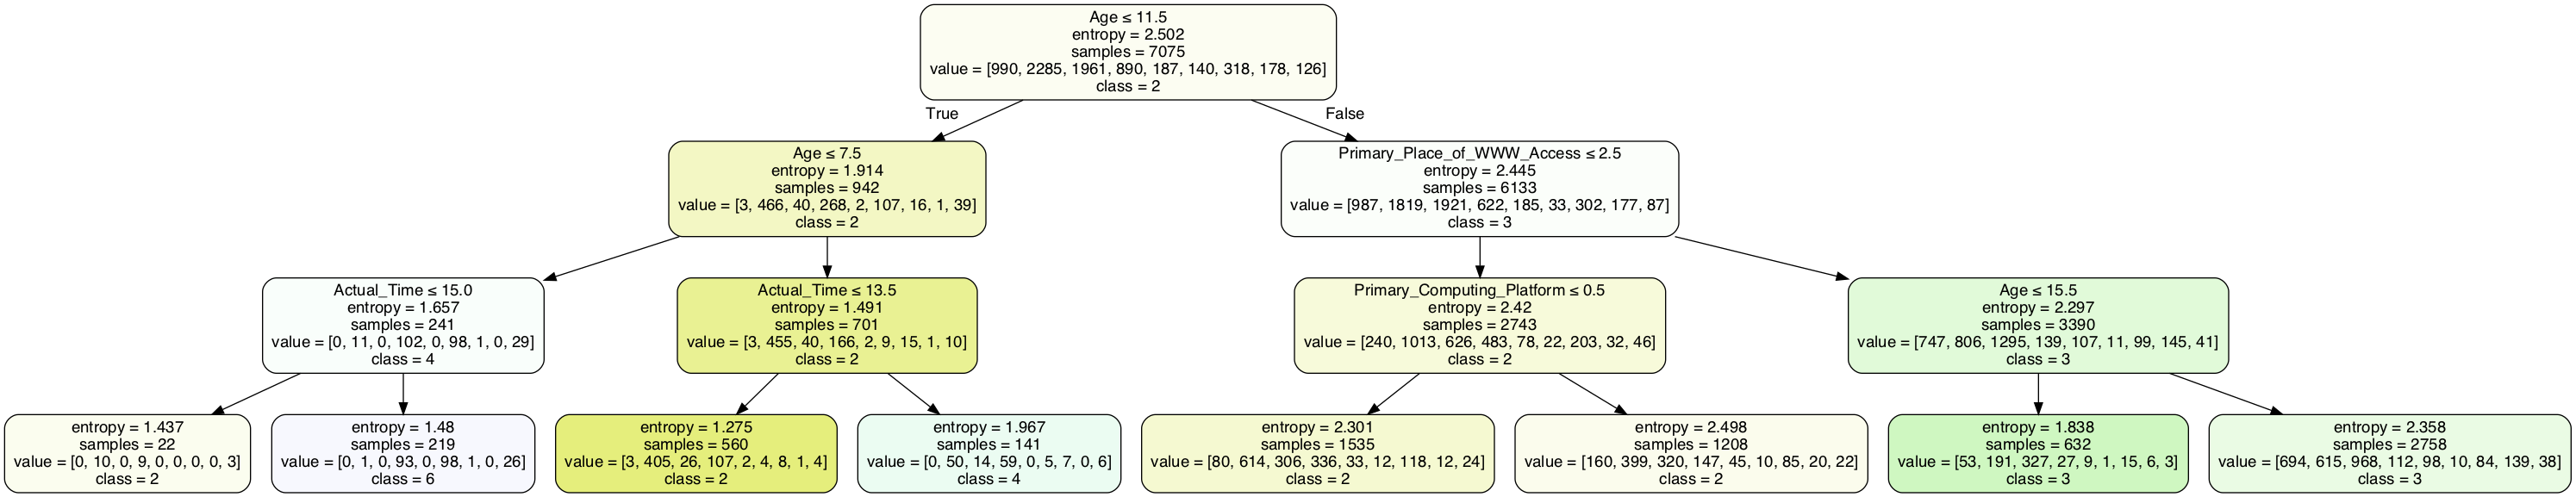

In [8]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = featureDF.columns.values,class_names=['1','2','3','4','5','6','7','8','9'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decisionTree/education/education-decision-tree-improved.png')
Image(graph.create_png())

There is significant difference between the model and the previous. This output is far less complex, explainable, and easy to understand. It looks like the 8% improvement in the accuracy has had a large impact on representation and divison. This shows a level of sensitivity in the tree algorithm to slight changes in parameter settings.

# PCA - Transformation

Next I will try PCA on my data to see if this improves accuracy.

In [9]:
from sklearn.decomposition import PCA

# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_train = pca_model.transform(X_train)
X_test = pca_model.transform(X_test)

# 2-Dimensions
X_train[:5]

array([[-10.11676968,  -9.182745  ],
       [ 48.65033192,   4.41690898],
       [ 48.18532306,  -6.56993334],
       [-26.56621987,  21.63930767],
       [-20.65227631,  -0.26962622]])

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.34124629080118696


In the above example, I plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, I have added the attribute selection measure entropy from the outset this time on the PCA data. My score is 34% which is still not as good as the original imporoved result without PCA of 40%

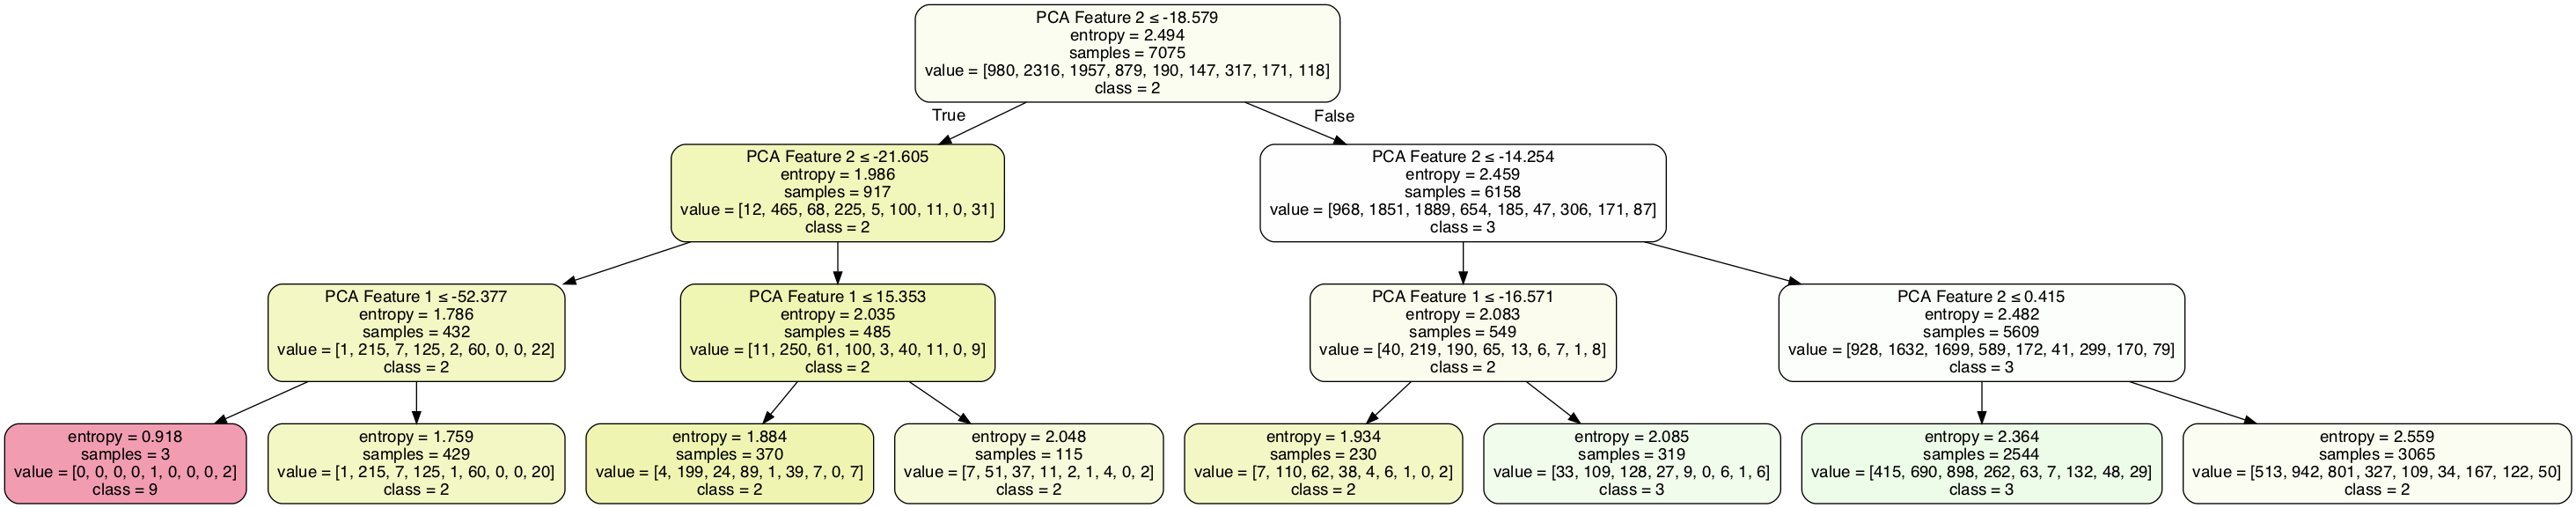

In [12]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = ['PCA Feature 1','PCA Feature 2'],class_names=['1','2','3','4','5','6','7','8','9'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decisionTree/education/education-decision-tree-pca.png')
Image(graph.create_png())

The decision tree is easily interpreted. However one thing I was not able to achieve was determining what the two features were from PCA, therefore the labels have been dummied to be PCA Feature 1 and 2 for this analysis.

# Performance and Comparison:

In summary DecisionTree classification has been performed on both a normal and PCA reduced data set for comparison in this analysis for Education_Attainment prediction.

Performance
* DecisionTree did not have a strong performance in terms of accuracy for this data set it is clear. 
* If we look at this from a readability and intepretation perspective this was the strongest algorithm per the tree results.
* Decision Tree is a good fit for non linear patterns.
* Decision trees implicitly perform variable screening or feature selection.
* Can handle both numerical and categorical data. Can also handle multi-output problems.
* It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
* PCA did not help performance of this predictor overall either, this did not provide improvement in the model accuracy.
* There was possibly too much distance and noise in the dataset despite best efforts to convert and reduce the feature subset. (Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting.)
* As indicated in the section on improved performance when using entropy, there was a large difference in the decision tree outputted which shows a level of sensitivity in the tree algorithm to slight changes in parameter settings.

Comparison
* Compared to the other algorithms used (Random and K-nearest neighbors) it is quite flexible and easy to implement.
* You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.
* In comparison to random forest the model is easiest to interpret, where you can easily make a decision by following the path in the decision tree you do not have that option in Random Forest.
* Not helpful at indicating important features.
* Of the two DecisionTree labels Major Occupation significantly slightly better than Education Attainment.
* Out of all of the algorithms tried Decision Tree has been indicated to be the most easy to use, understandable for intepreting results.
